In [1]:
# Install required packages
%pip install pandas numpy matplotlib seaborn scikit-learn jupyter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# ==================== CELL 1: IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# ==================== CELL 2: LOAD DATA ====================
# Update the path if your CSV is in a different location
df = pd.read_csv(r'C:\Users\pavan\Documents\Github P1\predictive-maintenace-system\machine predictive maintence classification\predictive_maintenance.csv')

print("📁 DATASET LOADED")
print("=" * 50)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nMemory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows:")
display(df.head())

📁 DATASET LOADED
Shape: 10000 rows × 10 columns

Memory usage: 0.76 MB

First 5 rows:


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [4]:
# ==================== CELL 3: DATASET OVERVIEW ====================
print("📊 DATASET INFORMATION")
print("=" * 50)
print(df.info())

print("\n📈 STATISTICAL SUMMARY")
print("=" * 50)
display(df.describe().T.style.background_gradient(cmap='Blues'))

📊 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None

📈 STATISTICAL SUMMARY


In [5]:
# ==================== CELL 4: DATA QUALITY CHECK ====================
print("🔍 DATA QUALITY CHECK")
print("=" * 50)

# Missing values
missing = df.isnull().sum()
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': (missing / len(df)) * 100
}).sort_values('Missing Values', ascending=False)

print("Missing Values Analysis:")
display(missing_df[missing_df['Missing Values'] > 0])

if missing.sum() == 0:
    print("✅ No missing values found!")

# Duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate Rows: {duplicates}")
if duplicates > 0:
    print(f"⚠️  Warning: {duplicates} duplicate rows found")
else:
    print("✅ No duplicate rows found")

🔍 DATA QUALITY CHECK
Missing Values Analysis:


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

✅ No missing values found!

🔍 Duplicate Rows: 0
✅ No duplicate rows found


🎯 TARGET VARIABLE DISTRIBUTION
Target Variable Summary:


Count  Percentage
Target                   
0        9661       96.61
1         339        3.39

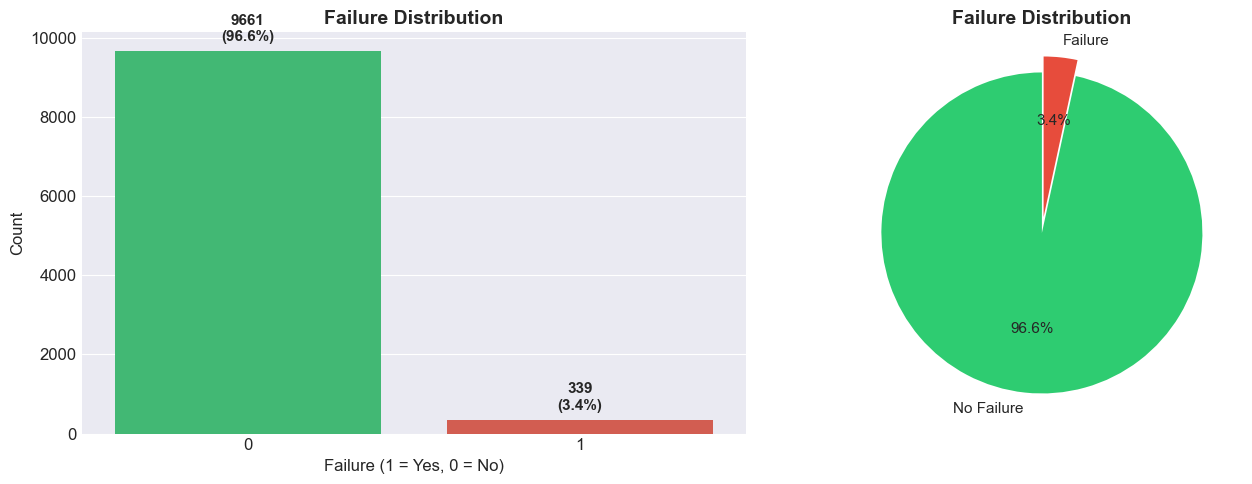


💡 Business Insight: Failure rate is 3.39%
📊 Class Imbalance Ratio: 28.5:1


In [6]:
# ==================== CELL 5: TARGET VARIABLE ANALYSIS ====================
print("🎯 TARGET VARIABLE DISTRIBUTION")
print("=" * 50)

if 'Target' in df.columns:
    target_counts = df['Target'].value_counts()
    target_percent = df['Target'].value_counts(normalize=True) * 100
    
    target_summary = pd.DataFrame({
        'Count': target_counts,
        'Percentage': target_percent
    })
    
    print("Target Variable Summary:")
    display(target_summary)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    bars = sns.countplot(data=df, x='Target', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
    axes[0].set_title('Failure Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Failure (1 = Yes, 0 = No)', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    
    # Add value labels on bars
    for i, (count, percent) in enumerate(zip(target_counts, target_percent)):
        axes[0].text(i, count + max(target_counts)*0.02, 
                    f'{count}\n({percent:.1f}%)', 
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Pie chart
    colors = ['#2ecc71', '#e74c3c']
    axes[1].pie(target_counts, labels=['No Failure', 'Failure'], 
                colors=colors, autopct='%1.1f%%', 
                startangle=90, explode=(0, 0.1),
                textprops={'fontsize': 11})
    axes[1].set_title('Failure Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 Business Insight: Failure rate is {target_percent[1]:.2f}%")
    print(f"📊 Class Imbalance Ratio: {target_counts[0]/target_counts[1]:.1f}:1")
    
else:
    print("❌ 'Target' column not found in dataset")
    print("Available columns:", df.columns.tolist())

# 🎯 COMPLETE EDA - ADVANCED ANALYSIS

This section contains detailed analysis of the predictive maintenance dataset.

In [7]:
"""
📦 SETUP & IMPORTS
Purpose: Load all necessary libraries and set visualization defaults
This cell prepares your Python environment for data analysis
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualization settings for consistent, professional-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Environment setup complete!")

✅ Environment setup complete!


In [8]:
"""
📁 LOAD DATA
Purpose: Read the CSV file into a pandas DataFrame
Important: Uses raw string (r'') to handle Windows file paths correctly
"""
df = pd.read_csv(r'C:\Users\pavan\Documents\Github P1\predictive-maintenace-system\machine predictive maintence classification\predictive_maintenance.csv')
print(f"✅ Data loaded successfully!")
print(f"   Rows: {df.shape[0]}, Columns: {df.shape[1]}")

✅ Data loaded successfully!
   Rows: 10000, Columns: 10


In [9]:
"""
📋 DATASET OVERVIEW
Purpose: Get first look at data structure and content
Shows: First rows, data types, memory usage, and basic statistics
"""
print("=" * 60)
print("DATASET SNAPSHOT")
print("=" * 60)

print("\n1️⃣ FIRST 5 ROWS (Preview of data):")
display(df.head())

print("\n2️⃣ DATASET INFORMATION (Data types and memory):")
df.info()

print("\n3️⃣ STATISTICAL SUMMARY (For numerical columns):")
display(df.describe().T)

DATASET SNAPSHOT

1️⃣ FIRST 5 ROWS (Preview of data):


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure


2️⃣ DATASET INFORMATION (Data types and memory):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB

3️⃣ STATISTICAL SUMMARY (For numerical columns):


count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

In [10]:
"""
🔍 DATA QUALITY CHECK
Purpose: Identify data issues that need cleaning
Checks: Missing values, duplicates, unique value counts
Critical for reliable machine learning
"""
print("=" * 60)
print("DATA QUALITY AUDIT")
print("=" * 60)

# 1. Check for missing values
missing = df.isnull().sum()
print("1. MISSING VALUES CHECK:")
if missing.sum() == 0:
    print("   ✅ Perfect! No missing values found")
else:
    print("   ⚠️  Found missing values:")
    for col, count in missing[missing > 0].items():
        print(f"      - {col}: {count} missing")

# 2. Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n2. DUPLICATE ROWS CHECK:")
print(f"   Found {duplicates} duplicate rows")

# 3. Check unique values per column
print("\n3. UNIQUE VALUES PER COLUMN:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"   {col:25s}: {unique_count:3d} unique values")

DATA QUALITY AUDIT
1. MISSING VALUES CHECK:
   ✅ Perfect! No missing values found

2. DUPLICATE ROWS CHECK:
   Found 0 duplicate rows

3. UNIQUE VALUES PER COLUMN:
   UDI                      : 10000 unique values
   Product ID               : 10000 unique values
   Type                     :   3 unique values
   Air temperature [K]      :  93 unique values
   Process temperature [K]  :  82 unique values
   Rotational speed [rpm]   : 941 unique values
   Torque [Nm]              : 577 unique values
   Tool wear [min]          : 246 unique values
   Target                   :   2 unique values
   Failure Type             :   6 unique values


TARGET VARIABLE: FAILURE PREDICTION
✅ Target column 'Target' found

📊 FAILURE STATISTICS:
   • Total samples: 10000
   • Failures: 339
   • Non-failures: 9661
   • Failure rate: 3.39%
   • Class ratio (No Failure : Failure): 28.5:1


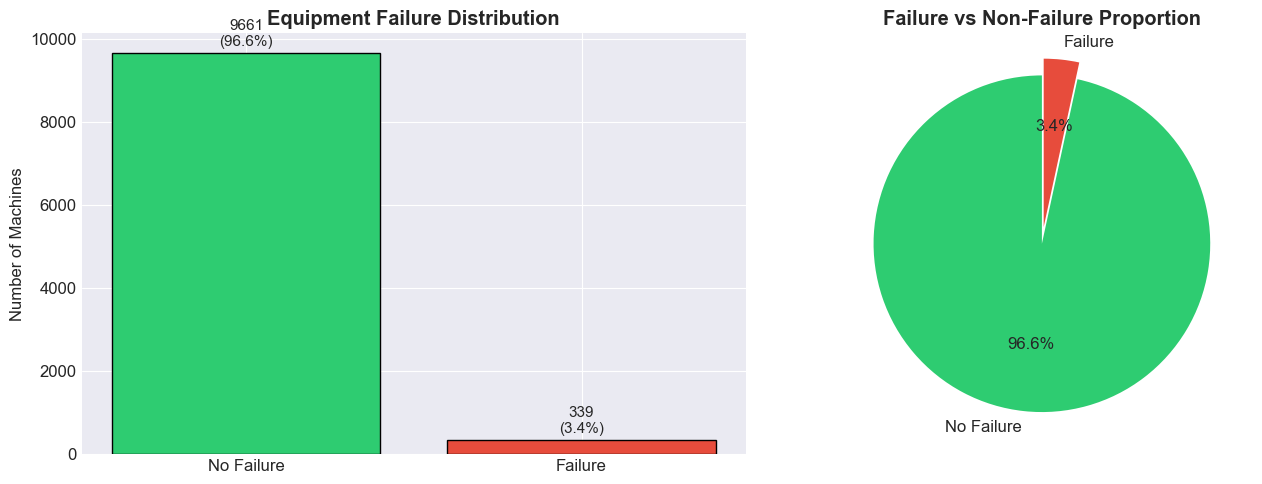

In [11]:
"""
🎯 TARGET VARIABLE ANALYSIS
Purpose: Understand what we're trying to predict
Analyzes: Failure rate, class imbalance, distribution
Key for: Choosing appropriate ML algorithms
"""
print("=" * 60)
print("TARGET VARIABLE: FAILURE PREDICTION")
print("=" * 60)

# Identify target column
target_col = 'Target'  # Kaggle dataset uses 'Target' for failure (1) or not (0)

if target_col in df.columns:
    # Calculate failure statistics
    failure_count = df[target_col].sum()
    total_count = len(df)
    failure_rate = (failure_count / total_count) * 100
    
    print(f"✅ Target column '{target_col}' found")
    print(f"\n📊 FAILURE STATISTICS:")
    print(f"   • Total samples: {total_count}")
    print(f"   • Failures: {failure_count}")
    print(f"   • Non-failures: {total_count - failure_count}")
    print(f"   • Failure rate: {failure_rate:.2f}%")
    print(f"   • Class ratio (No Failure : Failure): {(total_count-failure_count)/failure_count:.1f}:1")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    counts = [total_count - failure_count, failure_count]
    labels = ['No Failure', 'Failure']
    colors = ['#2ecc71', '#e74c3c']  # Green = good, Red = failure
    
    axes[0].bar(labels, counts, color=colors, edgecolor='black')
    axes[0].set_title('Equipment Failure Distribution', fontweight='bold')
    axes[0].set_ylabel('Number of Machines')
    
    # Add count labels on bars
    for i, count in enumerate(counts):
        axes[0].text(i, count + max(counts)*0.01, f'{count}\n({count/total_count*100:.1f}%)', 
                    ha='center', va='bottom', fontsize=11)
    
    # Pie chart
    axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%',
                startangle=90, explode=(0, 0.1))
    axes[1].set_title('Failure vs Non-Failure Proportion', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f"❌ Target column '{target_col}' not found!")
    print("Available columns:", df.columns.tolist())

FAILURE TYPE BREAKDOWN
📋 DISTRIBUTION OF FAILURE TYPES:
   1. No Failure               : 9652 occurrences (96.52%)
   2. Heat Dissipation Failure :  112 occurrences (1.12%)
   3. Power Failure            :   95 occurrences (0.95%)
   4. Overstrain Failure       :   78 occurrences (0.78%)
   5. Tool Wear Failure        :   45 occurrences (0.45%)
   6. Random Failures          :   18 occurrences (0.18%)


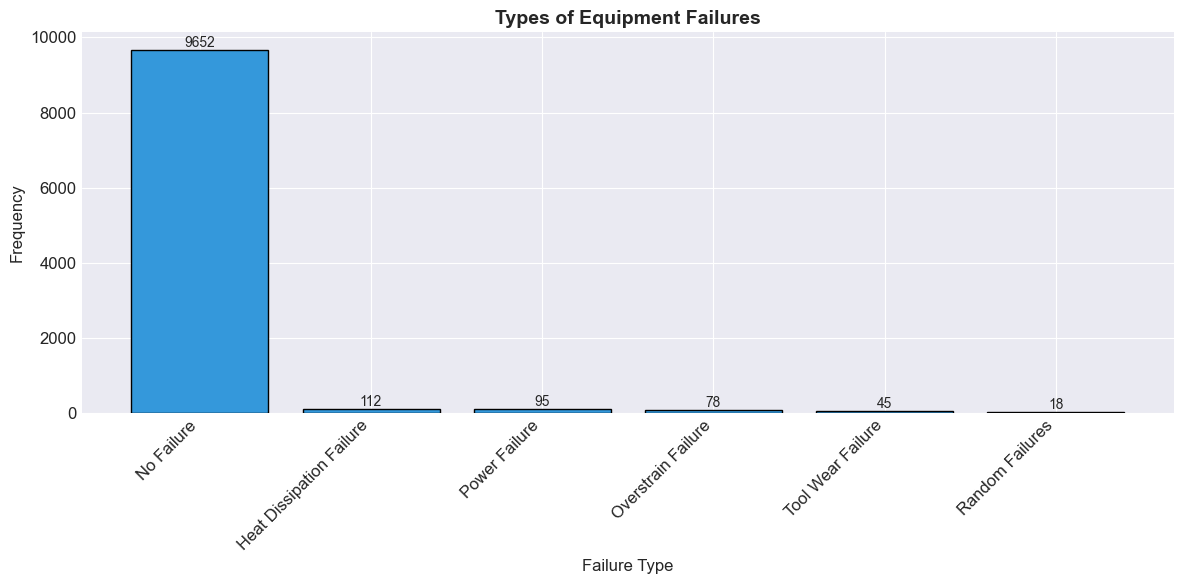

In [12]:
"""
🔧 FAILURE TYPE ANALYSIS
Purpose: Understand different reasons for equipment failure
Shows: Distribution of failure causes
Useful for: Root cause analysis and maintenance planning
"""
print("=" * 60)
print("FAILURE TYPE BREAKDOWN")
print("=" * 60)

# Check if failure type column exists
if 'Failure Type' in df.columns:
    failure_type_col = 'Failure Type'
    
    print("📋 DISTRIBUTION OF FAILURE TYPES:")
    failure_counts = df[failure_type_col].value_counts()
    
    # Display as table
    for i, (failure_type, count) in enumerate(failure_counts.items(), 1):
        percentage = (count / len(df)) * 100
        print(f"   {i}. {failure_type:25s}: {count:4d} occurrences ({percentage:.2f}%)")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    bars = plt.bar(failure_counts.index, failure_counts.values, 
                   color='#3498db', edgecolor='black')
    plt.title('Types of Equipment Failures', fontsize=14, fontweight='bold')
    plt.xlabel('Failure Type', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Note: 'Failure Type' column not found in this dataset")

SENSOR DATA DISTRIBUTIONS
🔍 Found 5 sensor-related columns:
   1. Air temperature [K]
   2. Process temperature [K]
   3. Rotational speed [rpm]
   4. Torque [Nm]
   5. Tool wear [min]


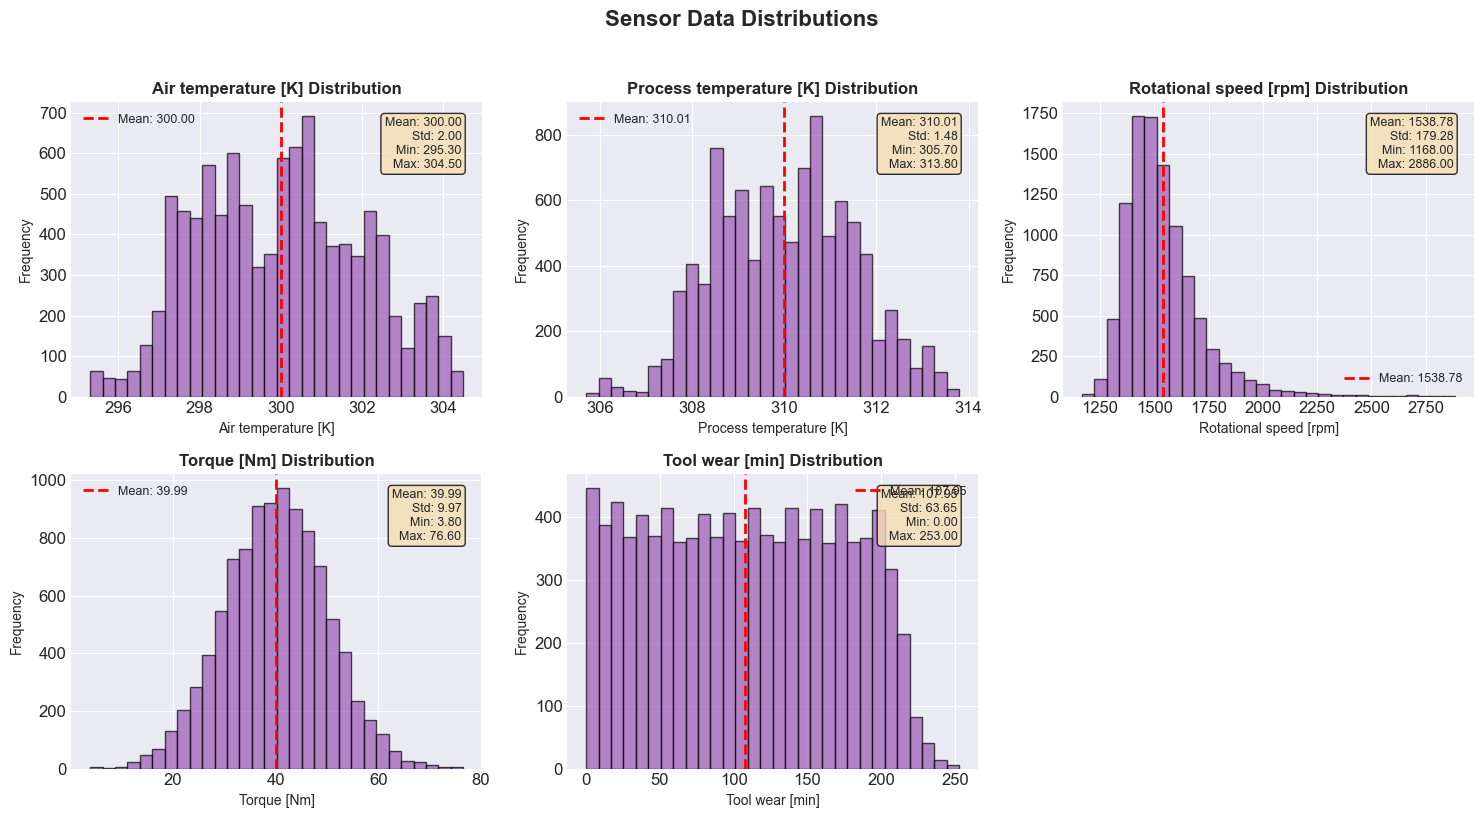

In [13]:
"""
📈 SENSOR DATA ANALYSIS
Purpose: Analyze sensor readings (temperature, pressure, etc.)
Shows: Distributions, outliers, patterns
Key for: Feature engineering and model input selection
"""
print("=" * 60)
print("SENSOR DATA DISTRIBUTIONS")
print("=" * 60)

# Identify sensor columns (common in predictive maintenance)
sensor_columns = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['temp', 'pressure', 'speed', 'torque', 'wear', 'sensor']):
        sensor_columns.append(col)

print(f"🔍 Found {len(sensor_columns)} sensor-related columns:")
for i, col in enumerate(sensor_columns, 1):
    print(f"   {i}. {col}")

if sensor_columns:
    # Create subplots for sensor distributions
    n_cols = 3
    n_rows = (len(sensor_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()
    
    for idx, sensor in enumerate(sensor_columns):
        if idx < len(axes):
            # Plot histogram
            axes[idx].hist(df[sensor], bins=30, alpha=0.7, color='#9b59b6', edgecolor='black')
            axes[idx].set_title(f'{sensor} Distribution', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(sensor, fontsize=10)
            axes[idx].set_ylabel('Frequency', fontsize=10)
            
            # Add statistics
            mean_val = df[sensor].mean()
            std_val = df[sensor].std()
            axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                            label=f'Mean: {mean_val:.2f}')
            axes[idx].legend(fontsize=9)
            
            # Add text box with statistics
            stats_text = f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nMin: {df[sensor].min():.2f}\nMax: {df[sensor].max():.2f}'
            axes[idx].text(0.95, 0.95, stats_text, transform=axes[idx].transAxes,
                          fontsize=9, verticalalignment='top',
                          horizontalalignment='right',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide empty subplots
    for idx in range(len(sensor_columns), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Sensor Data Distributions', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("No sensor columns identified. Checking all numerical columns...")
    # Fallback to all numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print("Numerical columns:", numerical_cols)

FEATURE CORRELATIONS
Analyzing correlations among 5 numerical features


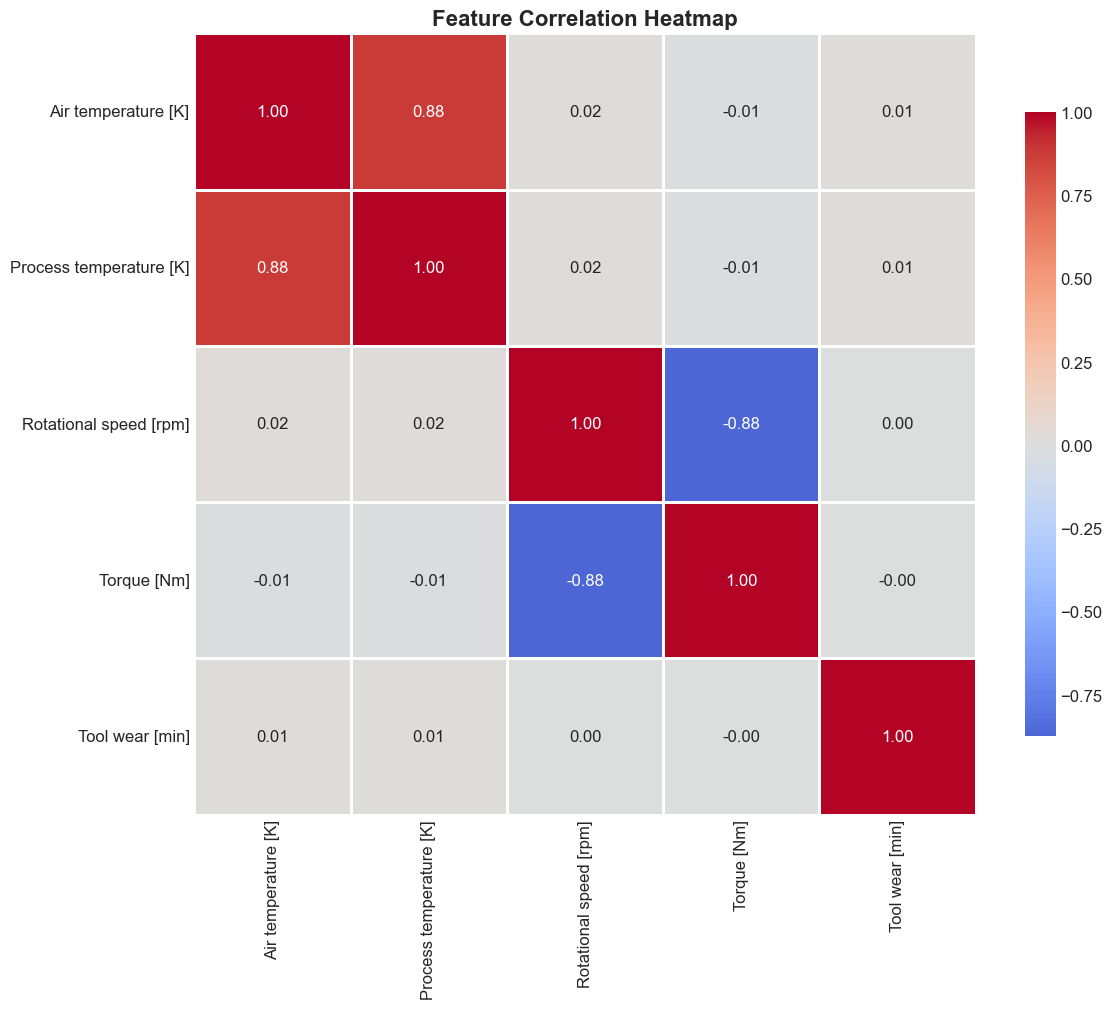


🎯 CORRELATION WITH TARGET (Failures):

Top features correlated with equipment failure:
    1. Torque [Nm]         : +0.191 (positively correlated)
    2. Tool wear [min]     : +0.105 (positively correlated)
    3. Air temperature [K] : +0.083 (positively correlated)
    4. Rotational speed [rpm]: -0.044 (negatively correlated)
    5. Process temperature [K]: +0.036 (positively correlated)


In [14]:
"""
🔗 CORRELATION ANALYSIS
Purpose: Find relationships between variables
Shows: Which features are most related to failures
Critical for: Feature selection and understanding data relationships
"""
print("=" * 60)
print("FEATURE CORRELATIONS")
print("=" * 60)

# Select numerical columns for correlation (exclude IDs)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove non-feature columns if they exist
for col in ['UDI', 'Product ID', 'Target']:
    if col in numerical_cols:
        numerical_cols.remove(col)

print(f"Analyzing correlations among {len(numerical_cols)} numerical features")

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show strongest correlations with target (if target is numerical)
if 'Target' in df.columns and 'Target' in df.select_dtypes(include=[np.number]).columns:
    print("\n🎯 CORRELATION WITH TARGET (Failures):")
    target_correlations = df[numerical_cols + ['Target']].corr()['Target'].drop('Target')
    target_correlations = target_correlations.sort_values(key=abs, ascending=False)
    
    print("\nTop features correlated with equipment failure:")
    for i, (feature, corr) in enumerate(target_correlations.head(10).items(), 1):
        direction = "positively" if corr > 0 else "negatively"
        print(f"   {i:2d}. {feature:20s}: {corr:+.3f} ({direction} correlated)")

In [15]:
"""
💾 SAVE RESULTS
Purpose: Save key findings for documentation and reporting
Creates: Summary statistics file and saves visualizations
Important for: Reproducibility and portfolio documentation
"""
print("=" * 60)
print("SAVING ANALYSIS RESULTS")
print("=" * 60)

import os

# Create directories if they don't exist
os.makedirs('data/processed', exist_ok=True)
os.makedirs('notebooks/plots', exist_ok=True)

# Create summary statistics
summary = {
    'Metric': [
        'Total Samples',
        'Total Features',
        'Failure Count',
        'Failure Rate (%)',
        'Missing Values',
        'Duplicate Rows'
    ],
    'Value': [
        len(df),
        len(df.columns),
        df['Target'].sum() if 'Target' in df.columns else 'N/A',
        f"{(df['Target'].sum()/len(df)*100):.2f}" if 'Target' in df.columns else 'N/A',
        df.isnull().sum().sum(),
        df.duplicated().sum()
    ]
}

summary_df = pd.DataFrame(summary)
print("📊 PROJECT SUMMARY:")
display(summary_df)

# Save summary to CSV
summary_path = 'data/processed/eda_summary.csv'
summary_df.to_csv(summary_path, index=False)
print(f"✅ Summary saved to: {summary_path}")

# Save the correlation heatmap
heatmap_path = 'notebooks/plots/correlation_heatmap.png'
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ Heatmap saved to: {heatmap_path}")

print("\n🎉 EDA COMPLETE! Ready for feature engineering and modeling.")

SAVING ANALYSIS RESULTS
📊 PROJECT SUMMARY:


Metric  Value
0     Total Samples  10000
1    Total Features     10
2     Failure Count    339
3  Failure Rate (%)   3.39
4    Missing Values      0
5    Duplicate Rows      0

✅ Summary saved to: data/processed/eda_summary.csv
✅ Heatmap saved to: notebooks/plots/correlation_heatmap.png

🎉 EDA COMPLETE! Ready for feature engineering and modeling.
